In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. **Monte Carlo basics**
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. Introduction to multivariate analysis techniques

# Chapter 6

## Topics

**[6.1 Errors](#6.1-Errors)**
- 6.1.1 Types of errors
- 6.1.2 Propagation of errors

**[6.2 Monte Carlo](#6.2-Monte-Carlo)**
- 6.2.1 Uniformly distributed random numbers
- 6.2.2 Numerical integration
- 6.2.3 Sampling from an arbitrary probability distribution
- 6.2.4 Optimization

## Further Reading Material

- **Cowan**: Chapter 1.6 - *Error propagation*
- **Cowan**: Chapter 3 - *Monte Carlo*
- **Barlow**: Chapter 4 - *Errors and error propagation*

## 6.1 Errors

A measurement is typically represented using its central value (i.e. mean), and its accompanying uncertainty (i.e. standard deviation). What is really done here is simplifying the representation of the actual probability distribution of this measurement using two quantities (mean and standard distribution). In most cases this is a sufficient way of representing measurements.

It is crucial, however, to know which distribution is followed by measurements (e.g. Poisson, Gaussian). In most cases, as a result of the central limit theorem (see above) the Gaussian approximation is valid. It is important, as otherwise tools such as the 'regular least-square fitting' will not apply.

### 6.1.1 Types of errors

There are two types of errors typically encountered in data science.

#### Statistical errors

Statistical errors are the ones that arise from 'random fluctuation' in the experiment (say due to the measuring instrument). By virtue of the central limit theorem, repeated measurements would improve how well the value can be known.

An example of this would be the oscillation period measured in the pendulum experiment

#### Systematic errors

Systematic errors are the ones that, as the name suggest, will not improve even if more data are collected (i.e. they are systematic). They are typically one of three sources: 1) (calibration) offset, 2) (quantity) scaling, 3) drift. These errors tend to make our statistical estimator biased.

An example related to the pendulum experiment would be the accuracy to which you can measure the length of the string. You may be able to obtain an uncertainty on it, but the experimental setup might come with limitations.

```Did you know... that we know the mass of planets in our Solar System much better in units of G times Solar masses than in kg? Measurements of their orbits are extremely accurate using Kepler's law, however the exact mass of the Sun is rather 'uncertain' due to uncertainties in the gravitational constant.```

<div class="example">Example: Errors in Rene's research</div>

<img src="images/error_types.png" width=75% >

*The above figure shows the optical light curves of a small star orbiting a pulsar. We can measure relative fluxes very well, which means that in a given filter (represented in different colours) the shape can be measured quite accurately. If we add more data or observed with a bigger telescope, we would increase the precision to which the shape of the light curves can be known. The measurement errors represented there are therefore statistical uncertainties. On the other hand, our work to model these light curves is hindered by an additional source of error, which is the fact that the absolute calibration of fluxes is very difficult to achieve. This means that each set of points could be shifted up or down by some small amount. Even if we can quantify the size of this error, the exact shift remains unknown and added more data will not help determining it any better. This is an example of a systematic error.*

### 6.1.2 Propagation of errors

_[See Barlow S4.3 for a full development]_

When measuring one or several quantities and combining them in the course of the analysis in order to obtain derived quantities, how do measurement uncertainties propagate?

#### One variable case

Let us imagine a variable $x$ which has an uncertainty describe by the variance $V(x)$. If we want to know the uncertainty on a quantity $f$ instead, which would be calculated as $f = ax + b$, with $a$ and $b$ constants, we can directly apply the definition of the variance to this function in order to evaluate its variance:
\begin{eqnarray}
  V(f) &=& \langle f^2 \rangle - \langle f \rangle^2 \\
       &=& \langle (ax + b)^2 \rangle - \langle ax + b \rangle^2 \\
       &=& a^2 \langle x^2 \rangle + 2ab \langle x \rangle + b^2 - a^2 \langle x \rangle^2 - 2ab \langle x \rangle - b^2 \\
       &=& a^2 (\langle x^2 \rangle - \langle x \rangle^2) \\
       &=& a^2 V(x) \,.
\end{eqnarray}

For any arbitrary function of one variable, it is easier to find how the error propagates if we express the function using a Taylor series expanded around the expected value up to the linear term. In which case:
\begin{equation}
  f(x) \approx f(x_0) + (x-x_0) \left( \frac{\partial f}{\partial x} \right)_{x=x_0} \,.
\end{equation}

If we apply the definition of the variance to the above expression, we obtain the following:
\begin{equation}
  V(f) \approx \left( \frac{\partial f}{\partial x} \right)^2 V(x) \,.
\end{equation}

#### General multiple variables case

In the case of a function of multiple variables, we can use the same development as above and show that:

\begin{equation}
  V(f) \approx \left( \frac{\partial f}{\partial x} \right)^2 V(x) + \left( \frac{\partial f}{\partial y} \right)^2 V(y) + \dots + 2 \left( \frac{\partial f}{\partial x} \right) \left( \frac{\partial f}{\partial y} \right) \operatorname{cov} (x,y) + \dots
\end{equation}

In the special case where the variables are uncorrelated, their covariance is zero and we retrieve the simple law of propagation of errors that we commonly use for the analysis of laboratory experiments.

## 6.2 Monte Carlo

Monte Carlo methods refer to a general class of computational techniques that rely on using random sampling in order to solve problems numerically. They are typically used to solve three types of problems:

1. Numerical integrations
2. Sampling from arbitrary probability distribution
3. Optimization

<img src="images/monte_carlo.jpg" width=80%>

### 6.2.1 Uniformly distributed random numbers

Monte Carlo methods are based on drawing samples from a stochastic process. In principle one would probability want to draw samples from specific distributions, however in practice this is not feasible. For most purposes the starting point of a Monte Carlo is to use a sequence of uniformly distributed random numbers. Several computer programs known as random number generator exist to produce these sequences. One caveat though is that algorithms fail to generate truly random sequences, and instead generate pseudo-random numbers which will pass tests for randomness but will repeat over long intervals.

A commonly used type of pseudo-random number generator is the so-called **linear congruential generator (LCG)**. It starts from an initial integer value $n_0$ called **seed** in order to generate a series iteratively using three parameters, the **multiplier** $a$, the **increment** $c$ and the **modulus** $m$ according to:
\begin{equation}
  n_{i} = (a n_{i-1} + c) \operatorname{mod} m \,,
\end{equation}
where $\operatorname{mod}$ is the modulo operator. The modulo operation $a \operatorname{mod} m$ returns the remainder of the division of $a$ by $m$. For example: $5 \operatorname{mod} 3 = 2$, $5 \operatorname{mod} 2 = 1$, $5 \operatorname{mod} 7 = 5$. Because of the modulo operator, the above equation will produce a set of integers in the range $[0,m-1]$ which would be uniformly distributed.

In order to obtain a uniformly distributed value in the range $[0,1[$ we can simply divide the above number by $m$:
\begin{equation}
  r_{i} = \frac{n_i}{m} \,.
\end{equation}

In order for the above to work well, $m$ should be a very large number so that a lot of fractional numbers are covered. Also, for fixed $a$, $c$ and $m$, such an algorithm will reproduce the same sequence for a given seed value and as soon as one of the values repeats, the same sequence will start over again. At best, there are $m$ possible values in the sequence and so the algorithm will repeat on a period $P \leq m$. In principle any choice of large $m$ number is fine, but in practice prime numbers are particularly well suited to produce well-behaved sequences.

<div class="example">Example 1</div>

Drawing random samples using the LCG. Here we use the following parameters:

| seed | a | m  | c |
| ---- | - | -- | - |
| 5    | 3 | 42 | 0 |

In [3]:
## We will try the multiplicative conguential generator method

## These are the initial parameters
seed = 5
a = 3
m = 42

n = [seed]
## We calculate 6 random numbers after the seed
for i in range(7):
    print('i: {}'.format(i))
    print('  n_{}: {}'.format(i,n[i]))
    an = a*n[i]
    n.append(an%m)
    print('  a*n_{} mod m: {}*{} mod {} = {} mod {} = {}'.format(i,a,n[-2],m,n[-2]*a,m,n[-1]))

i: 0
  n_0: 5
  a*n_0 mod m: 3*5 mod 42 = 15 mod 42 = 15
i: 1
  n_1: 15
  a*n_1 mod m: 3*15 mod 42 = 45 mod 42 = 3
i: 2
  n_2: 3
  a*n_2 mod m: 3*3 mod 42 = 9 mod 42 = 9
i: 3
  n_3: 9
  a*n_3 mod m: 3*9 mod 42 = 27 mod 42 = 27
i: 4
  n_4: 27
  a*n_4 mod m: 3*27 mod 42 = 81 mod 42 = 39
i: 5
  n_5: 39
  a*n_5 mod m: 3*39 mod 42 = 117 mod 42 = 33
i: 6
  n_6: 33
  a*n_6 mod m: 3*33 mod 42 = 99 mod 42 = 15


### 6.2.2 Numerical integration

In physics, most integrals do not have any analytical solutions. In fact, most real-life scenarios involve them. The canonical example is the integral of the Gaussian function:

\begin{equation}
  I = \int_a^b e^{-\frac{x^2}{2 \sigma^2}} \,{\rm d}x
\end{equation}

for which there is only a solution for the case with limits set to $(-\infty,\infty)$. In general, we must therefore tackle this integral and others numerically.

#### Deterministic integration methods

Let us consider the evaluation of an integral:

\begin{equation}
  I = \int_a^b f(x) dx
\end{equation}

##### Procedure for trapezoid integration
One possible way of performing this integral is by transforming it into a sum of $n$ small discrete intervals:

\begin{equation}
  I \approx \frac{b-a}{n} \sum_{i=1}^{n} f(x_i)
\end{equation}

with

\begin{equation}
  x_i = a + \left( i-\frac{1}{2} \right)\frac{(b-a)}{n}
\end{equation}

The above technique is known as trapezoid method because it breaks the interval into $n$ small trapezoids. For numerical techniques, the convergence is a measure of how far the computed solution is from the exact solution. In the case of the trapezoid method, it scales as $\mathcal{O}(1/n^2)$, where $n$ is the number of intervals. This means that doubling the number of intervals would quadruple the precision of the integral. This is not bad in one dimension, but if there are two dimensions this would imply gridding the areas with $n_1 \times n_2$ points (or $n^2$ if we choose the same number in each dimension). In $d$ dimensions, we would need $n^d$ points in total. As a result, the convergence of the d-dimensional trapezoid would scale as $\mathcal{O}(1/n^{2/d})$. For work in particle physics for instance, integrals often need to be computed in 6 dimensions (3 for space, and 3 for momentum/velocity), and sometimes even more. The trapezoid method then become quickly impracticable. Some more efficient deterministic integration techniques exists (e.g. Simpson's Rule, Runge-Kutta, etc) and have faster convergence rates.

#### Rationale behind Monte Carlo integration

As opposed to a deterministic integration technique such as the trapezoid methode, a Monte Carlo integration would use a sequence of randomly generated numbers to compute the integral. Why is it any useful to use random numbers? The law of large numbers tells us that:
\begin{equation}
  \lim_{n\to\infty} \bar{X}_n = \mu \,,
\end{equation}
which means that for a large number of samples the sample mean $\bar{X}_n$ should converge to the true mean $\mu$. We can therefore expect that even if a Monte Carlo method generates numbers at random, the integral will converge to the right answer.

If we apply the central limit theorem to the average of $n$ random numbers that are all drawn from a distribution having a variance $\sigma^2$, it should distribute as a Gaussian which has a variance equal to $\sigma^2 / n$. Given that an integration is basically a sum of numbers and that a Monte Carlo integral picks these numbers are random, its uncertainty will be given by the standard deviation of the mean (the root of the variance from the previous sentence): $\sigma / \sqrt{n}$.

We can therefore infer that a Monte Carlo integration would have a convergence which scales as $\mathcal{O}(1/\sqrt{n})$. Note that this number does not explicitely depends on the number of dimensions. While it is not as efficient as the trapezoid in one dimension, for a large number of dimensions the Monte Carlo method will become increasingly attractive.

#### 'Crude' Monte Carlo integration

<br>

##### Procedure for 'crude' Monte Carlo integration
Here is the procedure to integrate a function $f(x)$, $\int_a^b f(x) \, {\rm d}x$, using a crude Monte Carlo technique.

- Generate $n$ random numbers $r_i$ from a uniform distribution $U(0,1)$.
- Evaluate the integral according to:

  \begin{equation}
    \frac{b-a}{n} \sum_{i=1}^{n} f(x_i)
  \end{equation}
  with $x_i = a + r_i(b-a)$.

The idea above is to rescale the random numbers from a unit interval to the $[a,b]$ interval. On average, the small interval covered by a draw is $\frac{b-a}{n}$, which explains the factor in from of the sum.

#### Rejection sampling integration

A better alternative to the above technique is a procedure known as the acceptance-rejection method. Its modern use was popularised by the famous scientist von Neumann. The strategy relies on enclosing the function which is to be integrated within a box. This box needs to span a range equal to the integration limits (i.e. $a$ to $b$) and having a height $f_{\rm max}$, which is sufficiently high to contains any part of the said function as illustrated below. The idea is to generate random points within this box, and calculate the fraction that falls below the function compared to the total number. This fraction is equal to the ratio of the area of the function (i.e. the integral) to that of the box. Since the later can be determined trivally (width times height), the integral can be calculated easily.

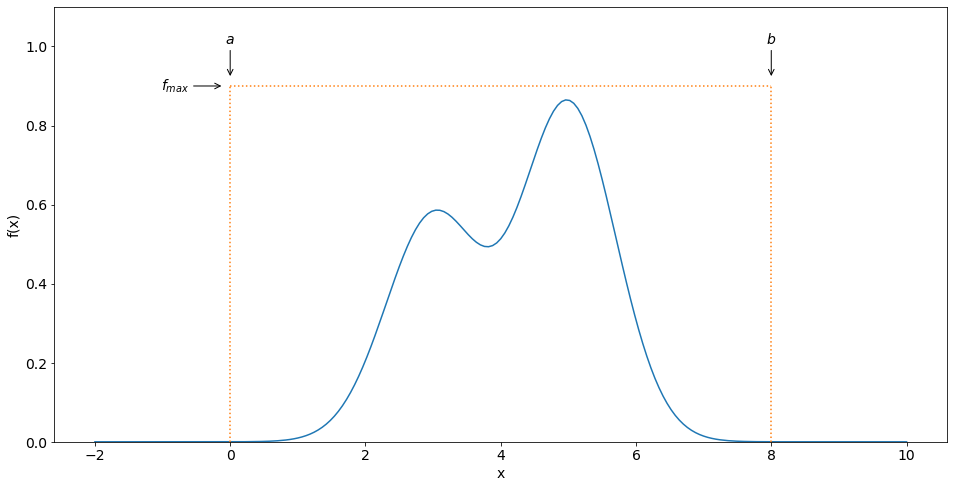

In [4]:
## Generating the subplot
fig, ax = plt.subplots(1, 1, figsize=(16,8))

x = np.linspace(-2,10,201)
y = scipy.stats.norm.pdf(x, loc=3, scale=0.7) + 1.5*scipy.stats.norm.pdf(x, loc=5, scale=0.7)

ax.plot(x, y)
ax.plot([0,0],[0,0.9],'C1:')
ax.plot([8,8],[0,0.9],'C1:')
ax.plot([0,8],[0.9,0.9],'C1:')

ax.annotate('$f_{max}$', xy=(-0.1, 0.9), xycoords='data',
            xytext=(-0.6, 0.9), textcoords='data', va='center', ha='right',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
ax.annotate('$a$', xy=(0.0, 0.92), xycoords='data',
            xytext=(0.0, 1.0), textcoords='data', va='bottom', ha='center',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
ax.annotate('$b$', xy=(8, 0.92), xycoords='data',
            xytext=(8, 1.0), textcoords='data', va='bottom', ha='center',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
ax.set_ylim(0,1.1)
ax.set_xlabel('x')
_ = ax.set_ylabel('f(x)')

##### Procedure for rejection sampling integration

Here is the procedure to integrate a function $f(x)$ using this method:

- Generate a random number $x_i$, uniformally distributed between $a$ and $b$, i.e. $x_i = a + r_i(b-a)$ with $r_i \sim U(0,1)$ (i.e. $r_i$ drawn from a uniform distribution between 0 and 1).
- Generate a second random number $u_i \sim U(0,1)$.
- If $u_i < f(x_i)/f_{\rm max}$, then accept $x_i$ (i.e. the point is below the function).

After $n$ iterations the value of the integral can by computed directly:

\begin{equation}
  \int_a^b f(x) {\rm d}x \approx \frac{n_{\rm accepted}}{n} (b-a) f_{\rm max} \,.
\end{equation}

The other nice aspect of this method is that the accepted samples $\{x_1, x_2, ..., x_n\}$ will be distributed according to $f(x)$. They can therefore be used for other purposes such as calculating the mean, standard deviation, etc.

This technique is however limited in terms of efficiency, which is essentially determined by the ratio $\frac{n_{\rm accepted}}{n}$. A standard problematic case would be for a function that has a very high, narrow peak but a heavy tail. In which case the box would enclose a large fraction of 'uninteresting' region. There are ways of optimizing the algorithm, but this will not be covered here.

<div class="example">Example 1: Calculating Pi</div>

Calculating the value of Pi ($\pi$) is one of the classical examples of using Monte Carlo integration. We know that the area of a circle is given by $A = \pi r^2$, where $r$ is the radius of the circle. Therefore, by calculating the area of a circle and dividing by the square of the radius, it is possible to calculate the value of $\pi$.

A convenient approach is to consider a circle of unit radius centered at (0,0), and calculating the area of the quarter of the circle located in the first quadrant (positve $x$ and $y$), which would yield $\pi/4$. We could consider the integral $I = \pi/4 = \int_0^1 \sqrt{1 - x^2} dx$ and use the technique defined above by inscribing the quarter wedge into a unit square ranging from 0 to 1 in both $x$ and $y$. Alternatively, we can also think in terms of geometry: it would be sufficient to generate $(x,y)$ pairs of uniform random numbers in the range [0,1], calculate the radius using $r = \sqrt{x^2 + y^2}$ and determine whether the pair is located at $r \leq 1$.

We shall use the second technique below.

Calculating the value of pi using a n=1000 points Monte Carlo
  Number of points with r = sqrt(x^2 + y^2) < 1: 798
  Ratio n_inside / n_total: 798/1000 = 0.79800
  Area of circle = ratio * area 1x1 square * 4 = 3.19200
  Measured pi value (pi = A / r^2): 3.19200
  Difference (measured-expected): 0.05041
  Fractional difference ((measured-expected/expected)): 0.01605


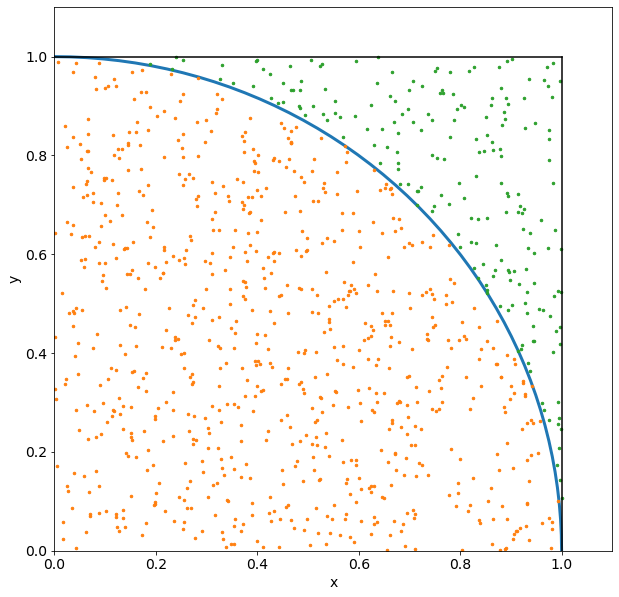

In [5]:
##### Actual Monte Carlo calculation

## Defining pairs of uniform random numbers, here 1000 of them
n = 1000
x = np.random.rand(n)
y = np.random.rand(n)

## Calculating the radius
r = np.sqrt(x**2 + y**2)

## Calculating the number that are within the unit wedge
inside = r < 1
ratio = np.sum(inside) / float(n)

## Calculating the value of pi, which is 4*I. Bear in mind that f_max*(b-a) is 1.
pi_measured = ratio * 4

print('Calculating the value of pi using a n={} points Monte Carlo'.format(n))
print('  Number of points with r = sqrt(x^2 + y^2) < 1: {}'.format(np.sum(inside)))
print('  Ratio n_inside / n_total: {}/{} = {:.5f}'.format(np.sum(inside),n,ratio))
print('  Area of circle = ratio * area 1x1 square * 4 = {:.5f}'.format(pi_measured))
print('  Measured pi value (pi = A / r^2): {:.5f}'.format(pi_measured))
print('  Difference (measured-expected): {:.5f}'.format(pi_measured-np.pi))
print('  Fractional difference ((measured-expected/expected)): {:.5f}'.format(pi_measured/np.pi-1))


##### Plotting the Monte Carlo data

## Generating the subplot
fig, ax = plt.subplots(1, 1, figsize=(10,10))

## Creating the circle in polar coordinates
theta = np.linspace(0,np.pi/2)
ax.plot(np.cos(theta), np.sin(theta), lw=3)

## Plotting the random points using two colours (for inside and outside)
ax.plot(x[inside], y[inside], '.', ms=5)
ax.plot(x[~inside], y[~inside], '.', ms=5)

## Boundaries of enclosing square
ax.plot([0,1],[1,1], 'k')
ax.plot([1,1],[0,1], 'k')

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)
ax.set_xlabel('x')
_ = ax.set_ylabel('y')

#### Advantages of using Monte Carlo Integration

- Simplicity
- Unbiased and consistent
- Parallel nature

#### Disadvantages of using Monte Carlo Integration

- Slow rate of convergence
- Difficult to evaluate the uncertainty of the approximation

### 6.2.3 Sampling from an arbitrary probability distribution

Suppose that you would like to generate samples drawn from an arbitrary probability distribution. This may be useful if you need to simulate a random process controlled by this PDF. A typical example would be to simulate a particular decay process in particle physics, where the probability of having a certain momentum for a given particle is given by a specific function.

There are three standard methods to produce such arbitrary probability distribution $f(x)$.

#### Method 1: Weighted sampling

Generate a uniform random variable $x = a + r(b-a)$ with $r \sim U(0,1)$, and weight each event by the factor $w = f(x)$. So each event is characterised by $x$ and $w$.

This method is extremely simple but has a restricted usefulness. It can be used, for instance, to calculate moments of a function.

#### Method 2: Rejection sampling

This is the method described earlier in the integration subsection.

#### Method 3: Inverse transform sampling

The probability integral transform (see Cowan, S3.2 for the proof) states that that if $f(x)$ is a continuous random variable with cumulative distribution function $F_{x}$, then the random variable $y=F(x)$ has a uniform distribution on $U(0,1)$. The consequence is that if we can determine the cumulative distribution function of a probability distribution, its inverse will be distributed like that distribution $f(x)$.

For instance, imagine the exponential function $f(x) = \frac{1}{\tau}e^{-x/\tau}$. The cummulative distribution function is:

\begin{eqnarray}
  F(X) &=& \int_0^{X} \frac{1}{\tau}e^{-x^\prime/\tau} \,{\rm d}x^\prime &=& r \\
       &=& 1 - e^{-X/\tau} &=& r \,,
\end{eqnarray}

with $r \sim U(0,1)$. If we invert the function we find that:

\begin{equation}
  X = -\tau \log (1-r) \,.
\end{equation}

Hence, by sampling $r$ from a uniform function and substituting into the above equation we can generate samples that follow the distribution $f(x)$.

This technique is the most optimal way of generating samples from an arbitrary probability distribution. However it requires to be able to calculate the cummulative distribution function (i.e. the integral) and inverting it, which for many functions is impossible to do analytically.

##### Procedure to generate random samples from inverse transform sample

1. Given a function that you want to sample from, $f(x)$, ensure that the function is normalised.
2. Calculate the cummulative distribution function from the minimum value that this function can take up to a certain value $X$ and set it equal to $r$: $\int_{\rm x_{min}}^X f(x) \,{\rm d}x = r$
3. Solve for $X$.
4. Draw a uniform random number between 0 and 1, $r \sim U(0,1)$, and insert it in the equation for $X$ from above. You now have a random sample that was draw from the original distribution, $X \sim f(x)$.

### 6.2.4 Optimization

Optimization cover a very wide range of problems. The goal is typically to simulate multiple alternate realisations of a situation and determine which one of them provides the most optimal solution, typically by analysing the value of a certain cost function.

There are multiple examples of it:

- Finding the best fit parameters of a model through a least square fit
- Finding the minimum of a function
- Reproducing the propagation of a particle subjected to scattering (i.e. ray tracing)
- Optimizing the itinerary of a [travelling salesman](https://en.wikipedia.org/wiki/Travelling_salesman_problem)


<div class="example">Example 1: Travelling salesman</div>

The travelling salesman problem is a well known problem in which one asks the question "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?". In computational complexity theory this is known as an NP-hard problem (i.e. non-deterministic polynomial-time problem), which forms the basis of the most difficult computational problems to solve. Several optimiszation problems are very similar to the travelling salesman problem, hence why it became so famous since the 1930s.

While there are more efficient algorithms to tackle specific cases of the travelling salesman problem, the brute force Monte Carlo approach consists of drawing an itinerary at random, calculating the total travelled distance, and repeat the process a number of times while keeping track of the best solution. The figure below illustrates the process.

<img src="images/Bruteforce.gif" width=90%>

(Source: [Saurabh.harsh](https://commons.wikimedia.org/wiki/User:Saurabh.harsh), [Bruteforce](https://commons.wikimedia.org/wiki/File:Bruteforce.gif), [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/legalcode))

<div class="example">Example 1: Ray tracing</div>

For ray tracing, the path of light rays is followed from the emitting source(s) and effects such as reflections on surfaces are taken into account through the propagation. A 'camera' is located at a certain position and registers the light coming to it.

<img src="images/1280px-Glasses_800_edit.png" width=60%>

(Source: [Gilles Tran](https://en.wikipedia.org/wiki/User:Gilles_Tran), [Ray tracing (graphics)](https://en.wikipedia.org/wiki/Ray_tracing_(graphics)), [CC0 1.0 Universal](https://creativecommons.org/publicdomain/zero/1.0/deed.en))

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>